__Writing a video using OpenCV__

While building applications, it becomes important to save demo videos of your work as well as many applications themselves might require saving a video clip. For example, in a surveiallance application, you might have to save a video clip as soon as you see something unusual happening.

In this notebook, we will describe how to save a video in __avi__ and __mp4__ formats using openCV.

####  <font color='green'>__OpenCV_Bootcamp_Lecture__</font>

Source: <a href="https://courses.opencv.org/courses/course-v1:OpenCV+Bootcamp+CV0/courseware/15486b3c65f34ddbbe02a35f44f34e18/f3ddebccceef494d933aaf88bcf49dde/" target="_blank">Source Link</a>

In [2]:
# import the library
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

### __Download Assets__

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

### __Read Video from Source__

In [5]:
source = 'race_car.mp4'  # source = 0 for webcam

cap = cv2.VideoCapture(source)

In [6]:
if not cap.isOpened():
    print("Error opening video stream or file")

<font color = 'Green'>__Read and display one frame__</font>

In [7]:
ret, frame = cap.read()

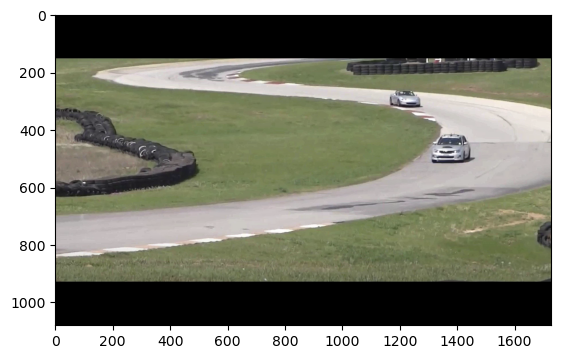

In [18]:
plt.imshow(frame[..., ::-1])

<font color = 'Green'>__Display the Video Frame__</font>

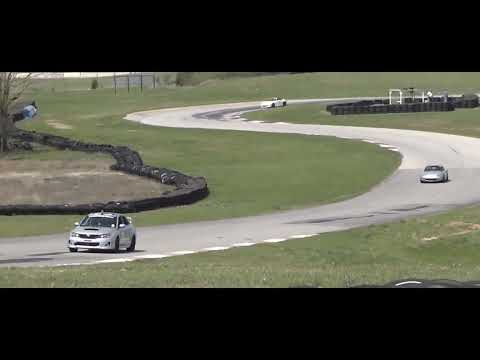

In [19]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

### __Write Video using OpenCV__

For writing the video, you need to create a videowriter object with the right parameters.

<font color='green'>__Function Syntax__</font>

_VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )_

where, __Parameters__

<span style='color: black; font-family: monospace; background-color: lightgray;'>filename</span>: Name of the output video file.

<span style='color: black; font-family: monospace; background-color: lightgray;'>fourcc</span>: 4-character code of codec used to compress the frames. For example, <span style='color: black; font-family: monospace; background-color: lightgray;'>::VideoWriter::fourcc('P','I','M','1')</span> is a MPEG-1 codec, fourcc('M','J','P','G') is a motion-jpeg codec etc. List of codes can be obtained at Video Codecs by FOURCC page. FFMPEG backend with MP4 container natively uses other values as fourcc code: see ObjectType, so you may receive a warning message from OpenCV about fourcc code conversion.

<span style='color: black; font-family: monospace; background-color: lightgray;'>fps</span>: Framerate of the created video stream.

<span style='color: black; font-family: monospace; background-color: lightgray;'>frameSize</span>: Size of the video frames.

In [20]:
# Default resolutions of the frame are obtained.
# Convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))

out_mp4 = cv2.VideoWriter("race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))

<font color='green'>__Read frames and write to file__</font>

We will read the frames from the race-car video and write the same to the two objects we created in the previous step. We should release the objects after the task is complete.

In [21]:
# Read until video is completed
while cap.isOpened():
    # Capture frame-by-frame
    ret, frame = cap.read()

    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)

    # Break the loop
    else:
        break

In [22]:
# When everything done, release the VideoCapture and VideoWriter objects
cap.release()
out_avi.release()
out_mp4.release()

To display video on Google Colab, we will install and use the ffmpeg package. Using ffmpeg we will change the encoding of the .mp4 file from XVID to H264

HTML 5 can properly render videos with H264 encoding and OpenCV doesn't have that encoding yet. That's why we need to change their encodings such that they can be rendered.

In [1]:
# Installing ffmpeg

!apt-get -qq install ffmpeg 

Der Befehl "apt-get" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


Currently, HTML5 only suports renedering of MP4 files, so we'll only change the encoding of the __race_car_out.mp4 file.

pip install python-ffmpeg

In [2]:
# Change video encoding of mp4 file from XVID to h264 
!ffmpeg -y -i "/content/race_car_out.mp4" -c:v libx264 "race_car_out_x264.mp4"  -hide_banner -loglevel error

Der Befehl "ffmpeg" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


Render MP4 Video

In [3]:
mp4 = open("/content/race_car_out_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=700 controls><source src="{data_url}" type="video/mp4"></video>""")

FileNotFoundError: [Errno 2] No such file or directory: '/content/race_car_out_x264.mp4'

The video rendered in the above cell should be the same as the following.

In [4]:
video = YouTubeVideo("2Gju7YLfkP0", width=700, height=438)
display(video)

NameError: name 'YouTubeVideo' is not defined

__END OF SESSION__